# Rescaling Galaxy Properties: Challenge problem #1


### Properties of the source galaxies 

1. Source galaxy luminosity in r- and g-bands are log-normal distributed according to two, distinct, SDSS-like scaling relations between halo mass and galaxy luminosity. 
2. At fixed halo mass, there exists a modest correlation in the scatter of the luminosities, such that galaxies brighter-than-average in the r-band are also brighter-than-average in the g-band.

### Desired properties of the target galaxies

1. Target galaxies should exhibit modified scaling relations $\langle L_{\rm r, g}\vert M_{\rm halo}\rangle$ as shown in the figures below.
2. All second moments should be preserved. At fixed halo mass, the level of scatter in each band should agree with the source galaxies, as should be the modest correlation in the scatter between the two bands. 
3. The level of scatter, and the level of correlation, may be assumed constant as a function of $M_{\rm halo}.$


In [1]:
%matplotlib inline

In [2]:
from challenge_problem1 import generate_source_galaxies, generate_target_galaxies

source_galaxies = generate_source_galaxies()
target_galaxies = generate_target_galaxies()

In [3]:
from scipy.stats import binned_statistic
logm_bins = np.linspace(10, 15.5, 50)
logm_mids = 0.5*(logm_bins[:-1] + logm_bins[1:])

median_rband_source, __, __ = binned_statistic(
        source_galaxies['host_halo_mass'], source_galaxies['luminosity_rband'], 
        bins=10**logm_bins, statistic='median')

median_gband_source, __, __ = binned_statistic(
    source_galaxies['host_halo_mass'], source_galaxies['luminosity_gband'], 
    bins=10**logm_bins, statistic='median')

median_rband_target, __, __ = binned_statistic(
        target_galaxies['host_halo_mass'], target_galaxies['luminosity_rband'], 
        bins=10**logm_bins, statistic='median')

median_gband_target, __, __ = binned_statistic(
    target_galaxies['host_halo_mass'], target_galaxies['luminosity_gband'], 
    bins=10**logm_bins, statistic='median')


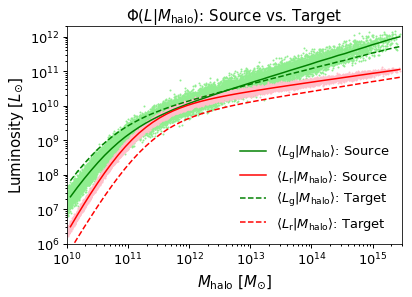

In [4]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip=50
__=ax.plot(10**logm_mids, median_gband_source, color='green', 
          label=r'$\langle L_{\rm g} \vert M_{\rm halo} \rangle$: Source')
__=ax.plot(10**logm_mids, median_rband_source, color='red', 
          label=r'$\langle L_{\rm r} \vert M_{\rm halo} \rangle$: Source')

__=ax.plot(10**logm_mids, median_gband_target, '--', color='green', 
          label=r'$\langle L_{\rm g} \vert M_{\rm halo} \rangle$: Target')
__=ax.plot(10**logm_mids, median_rband_target, '--', color='red', 
          label=r'$\langle L_{\rm r} \vert M_{\rm halo} \rangle$: Target')

__=ax.scatter(source_galaxies['host_halo_mass'][::nskip], 
              source_galaxies['luminosity_gband'][::nskip], 
              s=1, color='lightgreen', label='')
__=ax.scatter(source_galaxies['host_halo_mass'][::nskip], 
              source_galaxies['luminosity_rband'][::nskip], 
              s=1, color='pink', label='')

xlim = ax.set_xlim(1e10, 3e15)
ylim = ax.set_ylim(1e6, 2e12)

xlabel = ax.set_xlabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
ylabel = ax.set_ylabel(r'Luminosity $[L_{\odot}]$')
title = ax.set_title(r'$\Phi(L\vert M_{\rm halo})$: Source vs. Target')
legend = ax.legend()

figname = 'FIGS/mass_to_light_source_vs_target.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

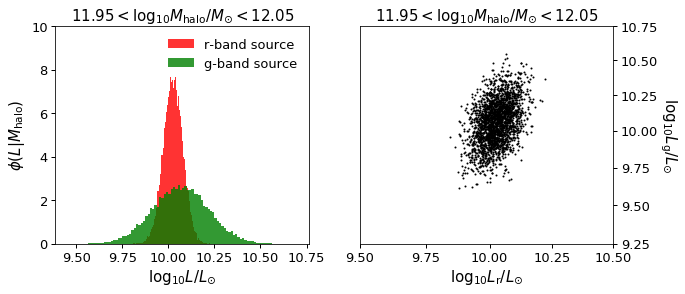

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

halo_mass_mask = source_galaxies['host_halo_mass'] < 10**12.05
halo_mass_mask *= source_galaxies['host_halo_mass'] > 10**11.95
sample = source_galaxies[halo_mass_mask]

__=ax1.hist(np.log10(sample['luminosity_rband']), bins=100, 
           alpha=0.8, color='red', normed=True, label='r-band source')
__=ax1.hist(np.log10(sample['luminosity_gband']), bins=100, 
           alpha=0.8, color='green', normed=True, label='g-band source')

xlabel1 = ax1.set_xlabel(r'$\log_{10}L/L_{\odot}$')
ylabel1 = ax1.set_ylabel(r'$\phi(L\vert M_{\rm halo})$')
title1 = ax1.set_title(r'$11.95 < \log_{10}M_{\rm halo}/M_{\odot} < 12.05$')
legend1 = ax1.legend()
ylim1 = ax1.set_ylim(0, 10)

#  Right panel 

__=ax2.loglog()

nskip2 = 10
__=ax2.scatter(np.log10(sample['luminosity_rband'][::nskip2]), 
              np.log10(sample['luminosity_gband'][::nskip2]), 
              s=1, color='k')

xlim2 = ax2.set_xlim(9.5, 10.5)
ylim2 = ax2.set_ylim(9.25, 10.75)

from matplotlib import ticker
xticks = (9.5, 9.75, 10, 10.25, 10.5)
yticks = (9.25, 9.5, 9.75, 10, 10.25, 10.5, 10.75)
ax2.set_xticks(xticks)
ax2.set_yticks(yticks)
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())

ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
xlabel2 = ax2.set_xlabel(r'$\log_{10}L_{\rm r}/L_{\odot}$')
ylabel2 = ax2.set_ylabel(r'$\log_{10}L_{\rm g}/L_{\odot}$', rotation=-90, labelpad=20)
title2 = ax2.set_title(r'$11.95 < \log_{10}M_{\rm halo}/M_{\odot} < 12.05$')


figname = 'FIGS/second_moments_luminosity_source.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')